# Predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. 

The description of the dataset is as follows:

In [74]:
# Following is the code to load required libraries and data:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import scorer, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder





C:\Users\pRoJyot\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)


In [50]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train.columns = col_labels
test.columns = col_labels

In [51]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
train['wage_class'].replace(to_replace = [' <=50K',' >50K'], value = [0,1], inplace = True)

In [53]:
test['wage_class'].replace(to_replace = [' <=50K.',' >50K.'], value = [0,1], inplace = True)

In [54]:
test['wage_class'].value_counts()

0    12435
1     3846
Name: wage_class, dtype: int64

In [55]:
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class         int64
dtype: object

In [56]:
for col in train.columns:
    print(f"{col} : {len(train[col].unique())} labels")

age : 73 labels
workclass : 9 labels
fnlwgt : 21648 labels
education : 16 labels
education_num : 16 labels
marital_status : 7 labels
occupation : 15 labels
relationship : 6 labels
race : 5 labels
sex : 2 labels
capital_gain : 119 labels
capital_loss : 92 labels
hours_per_week : 94 labels
native_country : 42 labels
wage_class : 2 labels


In [57]:
drop_col = []
for col in train.columns:
    if len(train[col].unique()) > 100:
        drop_col.append(col)
        
drop_col
                

['fnlwgt', 'capital_gain']

In [58]:
drop_col.append('capital_loss')
drop_col

['fnlwgt', 'capital_gain', 'capital_loss']

In [59]:
train.drop(columns = drop_col, axis = 1, inplace = True)

In [60]:
test.drop(columns = drop_col, axis = 1, inplace = True)


In [61]:
top_10_new_col_train = ['age', 'education', 'education_num', 'occupation','hours_per_week', 'native_country']
top_10_new_col_test = ['age', 'education', 'education_num', 'occupation','hours_per_week', 'native_country']

In [62]:
def topList_train(colName):
    top_colName = [x for x in train[colName].value_counts().sort_values(ascending = False).head(10).index]
    return {colName:top_colName}


In [63]:
def topList_test(colName):
    top_colName = [x for x in test[colName].value_counts().sort_values(ascending = False).head(10).index]
    return {colName:top_colName}


In [64]:
for index,newCol in enumerate(top_10_new_col_train):
    
    top10 = topList_train(newCol)
    top_10_new_col_train[index] = top10

In [65]:
for index,newCol in enumerate(top_10_new_col_test):
    
    top10 = topList_test(newCol)
    top_10_new_col_test[index] = top10

In [66]:
def one_hot_top_df(df, top):
    
    for variable,label in top.items():
        for counter,x in enumerate(label):
            
            df[variable+'_'+str(counter)] = np.where(df[variable] == label[counter], 1, 0)      
    

In [67]:
for new in top_10_new_col_train:
    one_hot_top_df(train, new)   


In [68]:
for new in top_10_new_col_test:
    one_hot_top_df(test, new)   


In [69]:
top_10_new_col_train = ['age', 'education', 'education_num', 'occupation','hours_per_week', 'native_country']
train.drop(top_10_new_col_train, axis = 1, inplace = True)

In [70]:
top_10_new_col_test = ['age', 'education', 'education_num', 'occupation','hours_per_week', 'native_country']
test.drop(top_10_new_col_test, axis = 1, inplace = True)

In [71]:
train.head()

,workclass,marital_status,relationship,race,sex,wage_class,age_0,age_1,age_2,age_3,...,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9
0,State-gov,Never-married,Not-in-family,White,Male,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Self-emp-not-inc,Married-civ-spouse,Husband,White,Male,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Private,Divorced,Not-in-family,White,Male,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Private,Married-civ-spouse,Husband,Black,Male,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Private,Married-civ-spouse,Wife,Black,Female,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
test.head()

,workclass,marital_status,relationship,race,sex,wage_class,age_0,age_1,age_2,age_3,...,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9
0,Private,Never-married,Own-child,Black,Male,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Private,Married-civ-spouse,Husband,White,Male,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Local-gov,Married-civ-spouse,Husband,White,Male,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Private,Married-civ-spouse,Husband,Black,Male,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,?,Never-married,Own-child,White,Female,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [75]:
label_encoder_wc = LabelEncoder()
label_encoder_ms = LabelEncoder()
label_encoder_or = LabelEncoder()
label_encoder_rs = LabelEncoder()
label_encoder_nc = LabelEncoder()

In [76]:
train['workclass'] = label_encoder_wc.fit_transform(train['workclass'])
train['marital_status'] = label_encoder_ms.fit_transform(train['marital_status'])
train['relationship'] = label_encoder_or.fit_transform(train['relationship'])
train['race'] = label_encoder_rs.fit_transform(train['race'])
train['sex'] = label_encoder_rs.fit_transform(train['sex'])

In [77]:
test['workclass'] = label_encoder_wc.fit_transform(test['workclass'])
test['marital_status'] = label_encoder_ms.fit_transform(test['marital_status'])
test['relationship'] = label_encoder_or.fit_transform(test['relationship'])
test['race'] = label_encoder_rs.fit_transform(test['race'])
test['sex'] = label_encoder_rs.fit_transform(test['sex'])


In [78]:
train.astype(int)

,workclass,marital_status,relationship,race,sex,wage_class,age_0,age_1,age_2,age_3,...,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9
0,7,4,1,4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,6,2,0,4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4,0,1,4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,2,0,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,2,5,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,2,5,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32557,4,2,0,4,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32558,4,6,4,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32559,4,4,3,4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [79]:
test.astype(int)

,workclass,marital_status,relationship,race,sex,wage_class,age_0,age_1,age_2,age_3,...,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9
0,4,4,3,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4,2,0,4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,2,0,4,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,2,0,2,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,4,3,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,4,0,1,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16277,0,6,2,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16278,4,2,0,4,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16279,4,0,3,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [80]:
y_train = train['wage_class']

In [81]:
y_test = test['wage_class']

In [82]:
train.drop(columns = ['wage_class'], axis = 1, inplace = True)

In [83]:
test.drop(columns = ['wage_class'], axis = 1, inplace = True)

In [84]:
X_train = train

In [85]:
X_test = test

In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32561, 65)
(32561,)
(16281, 65)
(16281,)


In [87]:
xgb = XGBClassifier()

In [88]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
xgb.score(X_test, y_test)

0.8091640562619004

In [90]:
y_pred = xgb.predict(X_test)

In [91]:
acc = accuracy_score(y_pred,y_test)

In [92]:
print("The prediction score is {:.2f} %".format(acc * 100))

The prediction score is 80.92 %


In [93]:
cf_mat = confusion_matrix(y_pred, y_test)

<AxesSubplot:>

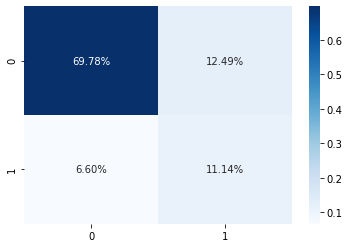

In [94]:
sns.heatmap(cf_mat/np.sum(cf_mat), annot = True,fmt='.2%', cmap='Blues')

Notebook End